In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [54]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

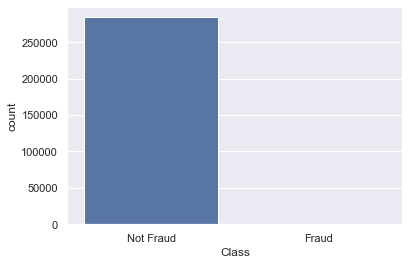

In [56]:
# visualize the target variable
g = sns.countplot(credit['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [57]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [58]:
X = credit.iloc[:, 1:-1]
y = credit.iloc[:, -1]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [60]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)#OUTPUT
#Accuracy score is: 0.992

Accuracy score is: 0.999592708069998


In [101]:
legit_count, fraud_count = credit['Class'].value_counts()

In [102]:
# Separate class
legit = credit[credit['Class'] == 0]
fraud = credit[credit['Class'] == 1]

In [103]:
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [104]:
X_fraud = fraud.iloc[:, 1:-1]
X_legit = legit.iloc[:, 1:-1]

In [105]:
xgb_y_predict_fraud = xgb_model.predict(X_fraud)

list(xgb_y_predict_fraud).count(0),list(xgb_y_predict_fraud).count(1)

(25, 467)

In [106]:
xgb_y_predict_legit = xgb_model.predict(X_legit)

list(xgb_y_predict_legit).count(0),list(xgb_y_predict_legit).count(1)

(284311, 4)

In [61]:
cnf_matrix = confusion_matrix(y_test,xgb_y_predict)
cnf_matrix

array([[71087,     4],
       [   25,    86]])

In [25]:
from sklearn.svm import SVC

## We can add class_weight='balanced' to penalize mistakes on the minorty class by an amount proporitonal to how unrepresented it is

In [26]:
model = SVC(class_weight='balanced', probability=True)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
prediction = model.predict(x_test)
not_fraud_pred = prediction == 0
fraud_pred = prediction == 1
not_fraud_pred.sum(), fraud_pred.sum()

In [ ]:
not_fraud = y_test==0
fraud = y_test==1
not_fraud.sum(), fraud.sum()